# Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not

# importing data set

In [1]:
import pandas as pd
import numpy as np
fraud_df=pd.read_csv("Fraud_check.csv")
fraud_df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# Exploratory data analysis(EDA)

In [2]:
#check how many data points in the data set
fraud_df.count()

Undergrad          600
Marital.Status     600
Taxable.Income     600
City.Population    600
Work.Experience    600
Urban              600
dtype: int64

In [3]:
#check how many rows and columns
fraud_df.shape

(600, 6)

In [4]:
#check how many rows and columns
fraud_df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [5]:
#find all the information of the data set
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
Undergrad          600 non-null object
Marital.Status     600 non-null object
Taxable.Income     600 non-null int64
City.Population    600 non-null int64
Work.Experience    600 non-null int64
Urban              600 non-null object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
# Marital.Status,Taxable.Income,City.Population,City.Population,Work.Experience,  
#we have to rename those variables

fraud_df = fraud_df.rename(columns = {'Marital.Status':'Marital_Status', 'Taxable.Income':'Taxable_Income', 
                                      'City.Population':'City_Population', 'Work.Experience':'Work_Experience'})


In [7]:
#check how many rows and columns
fraud_df.columns

Index(['Undergrad', 'Marital_Status', 'Taxable_Income', 'City_Population',
       'Work_Experience', 'Urban'],
      dtype='object')

In [8]:
#here Taxable_Income is our target variable, 
#treating those who have taxable_income <= 30000 as "Risky" and others are "Good"
#convert Taxable_Income as categorical form

In [9]:
fraud_df["Taxable_Income"]=pd.cut(fraud_df.Taxable_Income ,bins=[0,30000,200000],labels=["Risky","Good"])

In [10]:
#display first few records in a data frame
fraud_df.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


In [11]:
fraud_df["Taxable_Income"].value_counts()

Good     476
Risky    124
Name: Taxable_Income, dtype: int64

In [12]:
#In our data set many categorical variable. so convert it into a numerical format
#Undergrad', 'Marital_Status, urben are in categorical form
#here i am using label encoding


In [13]:
# Import label encoder 
from sklearn import preprocessing 
  

label_encoder = preprocessing.LabelEncoder() 
  

In [14]:
fraud_df['Undergrad']= label_encoder.fit_transform(fraud_df['Undergrad']) 
  
fraud_df['Undergrad'].unique()

array([0, 1], dtype=int64)

In [15]:
fraud_df['Marital_Status']= label_encoder.fit_transform(fraud_df['Marital_Status']) 
  
fraud_df['Marital_Status'].unique()

array([2, 0, 1], dtype=int64)

In [16]:
fraud_df['Urban']= label_encoder.fit_transform(fraud_df['Urban']) 
  
fraud_df['Urban'].unique()

array([1, 0], dtype=int64)

In [17]:
fraud_df.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,0,2,Good,50047,10,1
1,1,0,Good,134075,18,1
2,0,1,Good,160205,30,1
3,1,2,Good,193264,15,1
4,0,1,Good,27533,28,0


# Visualization


Here we are using three types of analysis techniques:

Univariate analysis

Bivariate analysis

Multivariate analysis

Univariate analysis:
Univariate analysis means one variable analysis.'Uni' means 'one' and 'variate' means'variable'. Univariate analysis is to analyse one variable or one features Univariate basically tells us how data in each feature is distributed and also tells us about central tendencies like mean, median, and mode.

To do univariate data analysis we use following ploting mechanisms:

Histograms

Boxplot

# Histograms

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
 

Here I am using two method for drawing histogram: FacetGrid and Distplot

FacetGrid() is used by drawing multiple occurence of the same plot on different subsets of dataset.It is used to represent one dimensional data. Distplot is used to show a histogram with a line.distplot is very helpful to show the data variation.To draw a distplot we use compinations of matlpotlib and seaborn visualization libraries in pandas

C:\Users\sathi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


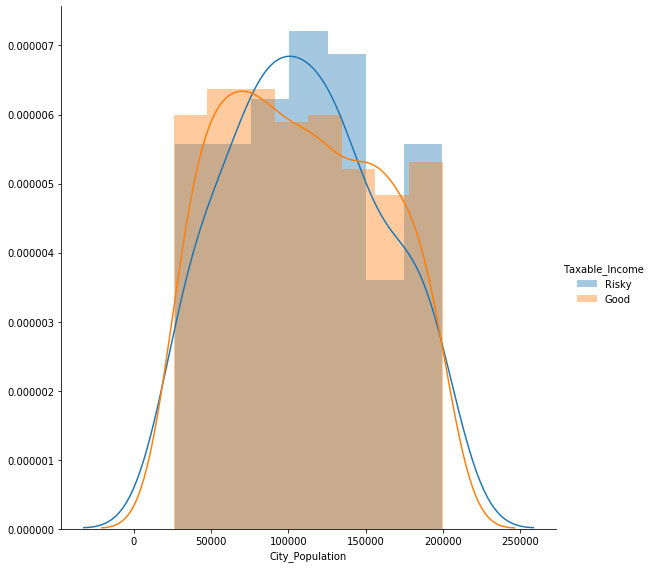

In [19]:
#Univariate analysis of  City_Population using Histograms
g = sns.FacetGrid(fraud_df, hue = "Taxable_Income",size=8)
g.map(sns.distplot, "City_Population")
g.add_legend()
plt.show()

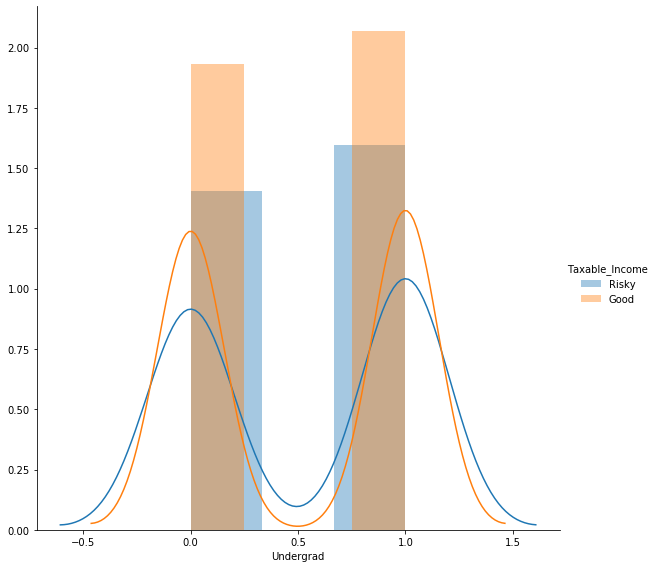

In [20]:
#Univariate analysis of   undergrad using Histograms
g = sns.FacetGrid(fraud_df, hue = "Taxable_Income",size=8)
g.map(sns.distplot, "Undergrad")
g.add_legend()
plt.show()

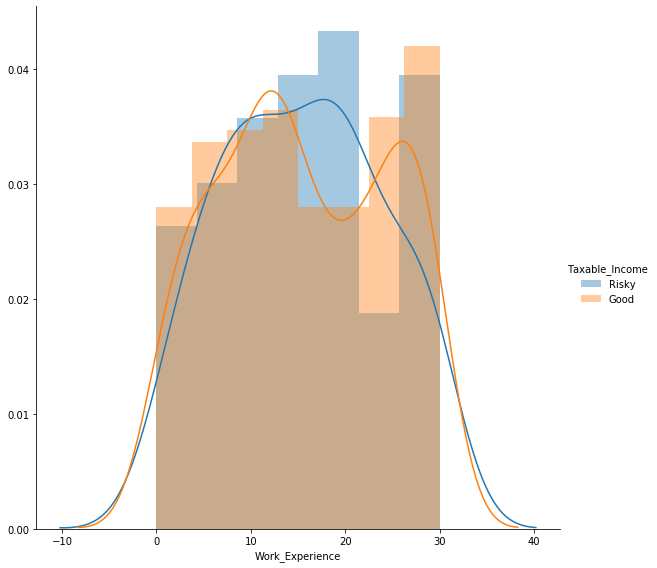

In [21]:
#Univariate analysis of  work experiene using Histograms
g = sns.FacetGrid(fraud_df, hue = "Taxable_Income",size=8)
g.map(sns.distplot, "Work_Experience")
g.add_legend()
plt.show()

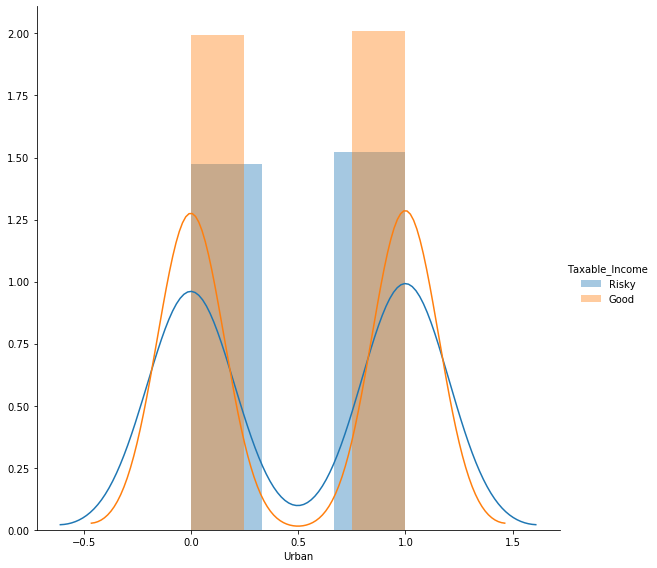

In [22]:
#Univariate analysis of  Urben using Histograms
g = sns.FacetGrid(fraud_df, hue = "Taxable_Income",size=8)
g.map(sns.distplot, "Urban")
g.add_legend()
plt.show()

conclusion:

here we can see that in all cases, it would be difficult to classify the Taxable income as riskey and Good, the data is not seperatable. data is highly overlapped..in a graphical representation we can say that its difficult to seperate the fraud data 

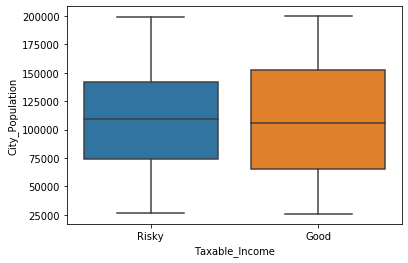

In [23]:
#Boxplot representation of City_Population
sns.boxplot(x='Taxable_Income',y='City_Population',data=fraud_df)

Here we can see that data distribtion based on city_population.Using this box we easily identify the outlies.Here we can see that there is no outliers in the data set. So Boxplot is very helpful to identify the outliers

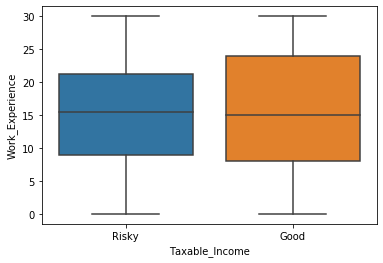

In [24]:
#Boxplot representation of work_experience
sns.boxplot(x='Taxable_Income',y='Work_Experience',data=fraud_df)

no outliers

C:\Users\sathi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


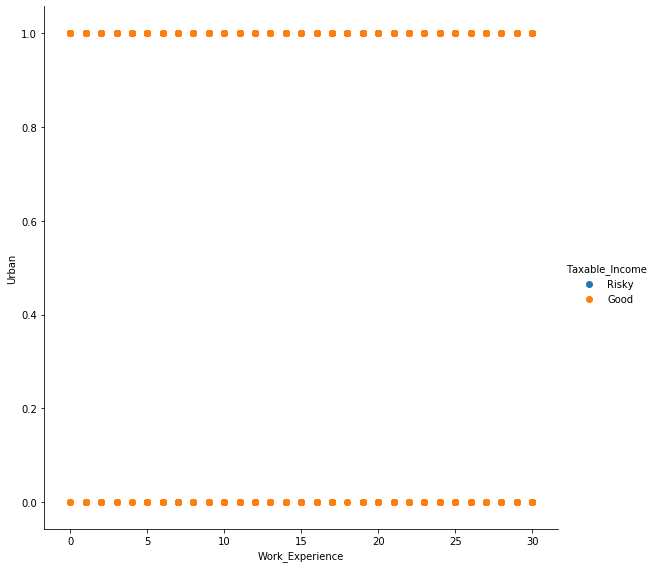

In [25]:
g = sns.FacetGrid(fraud_df, hue = "Taxable_Income",size=8)
g.map(plt.scatter, "Work_Experience","Urban")
g.add_legend()
plt.show()

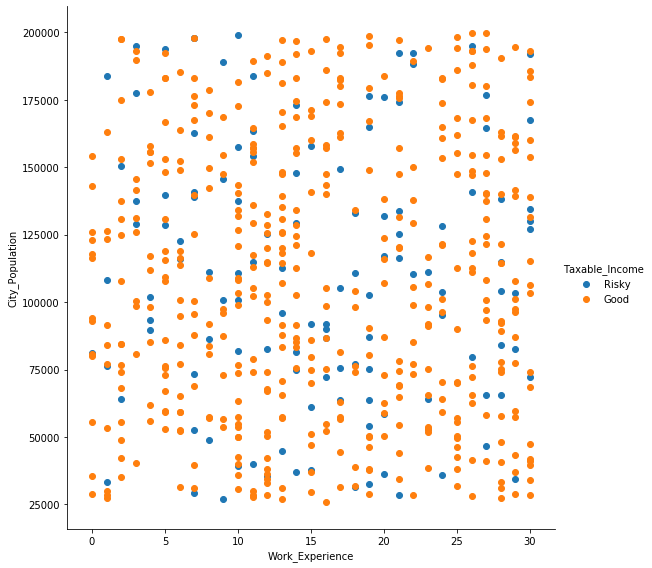

In [26]:
g = sns.FacetGrid(fraud_df, hue = "Taxable_Income",size=8)
g.map(plt.scatter, "Work_Experience","City_Population")
g.add_legend()
plt.show()

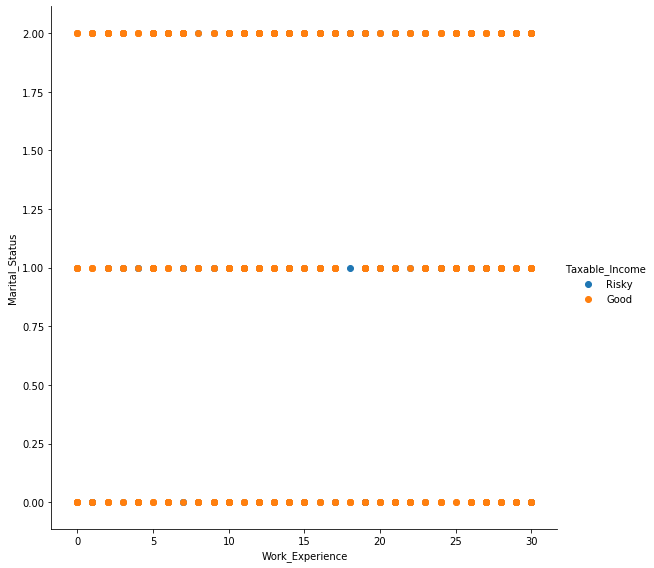

In [27]:
g = sns.FacetGrid(fraud_df, hue = "Taxable_Income",size=8)
g.map(plt.scatter, "Work_Experience","Marital_Status")
g.add_legend()
plt.show()

# Feature Engineering

In this module we would perform some feature selection methods. 

so here the featture seleaction is not a big task.In a large data set, feature selection plays an important role.Using more feature may results bad prediction. So feature selection is most important part of any machine learning algorithms

In this modulule we have to divide our data sets into two parts: Training and testing data. Before that we check the null values present in features and correlation between the features. If more features are highly correlates, that will effect the accuracy of algorithms. So the faeture selection should be done carefully

In [28]:
#check the presence of null values in a data set
fraud_df.isnull().sum()

Undergrad          0
Marital_Status     0
Taxable_Income     0
City_Population    0
Work_Experience    0
Urban              0
dtype: int64

here we can see that there is no null values present in the data set

# Using heat map to check the null value

sns.heatmap(data=fraud_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [29]:
##using heat to show the correlation between the features

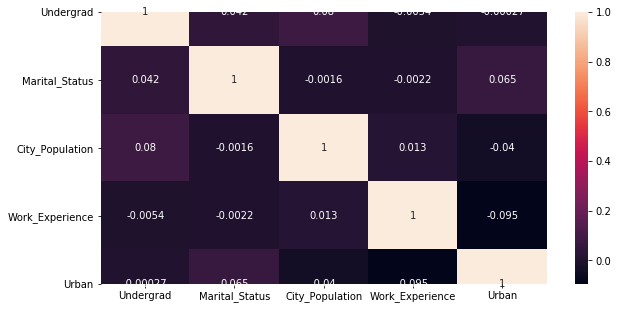

In [30]:
plt.figure(figsize=(10,5))
sns.heatmap(fraud_df.corr(),annot=True)
plt.show()

Here we can see that correlation between the features. Dark cell indicates the less correlation and light cell indicate the high correlation.here correlation between the depandant variable and independant variable are very less. so it will afferect the accuracy of our model

# Training and splitting the data

n this data set 'Undergrad', 'Marital_Status','City_Population',
       'Work_Experience', 'Urban' are features and Taxable_Income are our target

so we seperate feature and target variables from a data set

In [31]:
fraud_df.columns

Index(['Undergrad', 'Marital_Status', 'Taxable_Income', 'City_Population',
       'Work_Experience', 'Urban'],
      dtype='object')

In [32]:
#replace categorical variable Taxable_Income into numerical form
fraud_df['Taxable_Income']= label_encoder.fit_transform(fraud_df['Taxable_Income']) 
  
fraud_df['Taxable_Income'].unique()

array([0, 1], dtype=int64)

In [33]:
fraud_df['Taxable_Income'].value_counts()    # good is converted to 0,and risk is converted to 1

0    476
1    124
Name: Taxable_Income, dtype: int64

In [34]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
Undergrad          600 non-null int32
Marital_Status     600 non-null int32
Taxable_Income     600 non-null int32
City_Population    600 non-null int64
Work_Experience    600 non-null int64
Urban              600 non-null int32
dtypes: int32(4), int64(2)
memory usage: 18.9 KB


In [35]:
feature_names = ['Undergrad', 'Marital_Status', 'City_Population',
       'Work_Experience', 'Urban' ]
X = fraud_df[feature_names]#Feature
y = fraud_df['Taxable_Income']#target

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((450, 5), (450,), (150, 5), (150,))

Here we are successfully splitted our data se

# Building a model using Decision Tree 

In [38]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(X_train, y_train)


In [39]:
predictn = model.predict(X_test)
print(predictn)

[0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0
 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 1]


In [40]:
#using confusion matrix to check the accuracy

In [41]:
from sklearn.metrics import confusion_matrix
c_matrix=confusion_matrix(y_test,predictn)
print(c_matrix)

[[85 28]
 [33  4]]


Here the confusion matrics contains two rows and two columns. Number of rows and columns of confusion matrix determined by the number of things we want to predict.

Here we had to predict two things such as level of Total_Income like Risk(1), good(0), that why the confusion matrix had two rows and two columns

In our confusion matrix the diagonal values(133,37) is correctly predicted.

Following are the classification reports

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictn))

              precision    recall  f1-score   support

           0       0.72      0.75      0.74       113
           1       0.12      0.11      0.12        37

    accuracy                           0.59       150
   macro avg       0.42      0.43      0.43       150
weighted avg       0.57      0.59      0.58       150



In [43]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.59


In [44]:
predictn


array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1])